# Group 2 - Lego Assignment

This notebook performs data loading, merging, and analysis on multiple tables provided in an Excel file.

The focus is on creating visualizations and saving them for inclusion in reports.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Switch off future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Load the Excel file
file_path = 'ASDA_assignment_2.xlsx'
xls = pd.ExcelFile(file_path)

# Load the sheets, skipping "Original sheet" and select 5 others for analysis
sheet_names = [sheet for sheet in xls.sheet_names if sheet != "Original sheet"]
dataframes = [xls.parse(sheet) for sheet in sheet_names]

# Combine DataFrames based on common keys
main_table, colour_table, shape_info_table, age_group_table, height_table = dataframes

# Merging the tables on identified keys
combined_df = pd.merge(main_table, colour_table, on='colour_id', how='left')
combined_df = pd.merge(combined_df, shape_info_table, on='sof_id', how='left')
combined_df = pd.merge(combined_df, age_group_table, on='age_id', how='left')
combined_df = pd.merge(combined_df, height_table, on='height_id', how='left')

# Clean up duplicate or irrelevant columns
combined_df = combined_df.drop(columns=['colour_fill'])

combined_df.head()

,unique_id,nod,colour_id,sof_id,height_id,age_id,units,colour_name,colour_code,shape,type,age_group,height
0,CB-YL1-4-CL,4,YL1,CB,1,CL,1,Yellow,#ffff00,Cube,Brick,Classical,Normal
1,CB-YL1-4-CL,4,YL1,CB,1,CL,1,Yellow,#ffff00,Square,Brick,Classical,Normal
2,CD-YL1-2-CL,2,YL1,CD,1,CL,2,Yellow,#ffff00,Cuboid,Brick,Classical,Normal
3,CD-YL1-2-CL,2,YL1,CD,1,CL,2,Yellow,#ffff00,Rectangle,Brick,Classical,Normal
4,CD-YL1-6-CL,6,YL1,CD,1,CL,1,Yellow,#ffff00,Cuboid,Brick,Classical,Normal


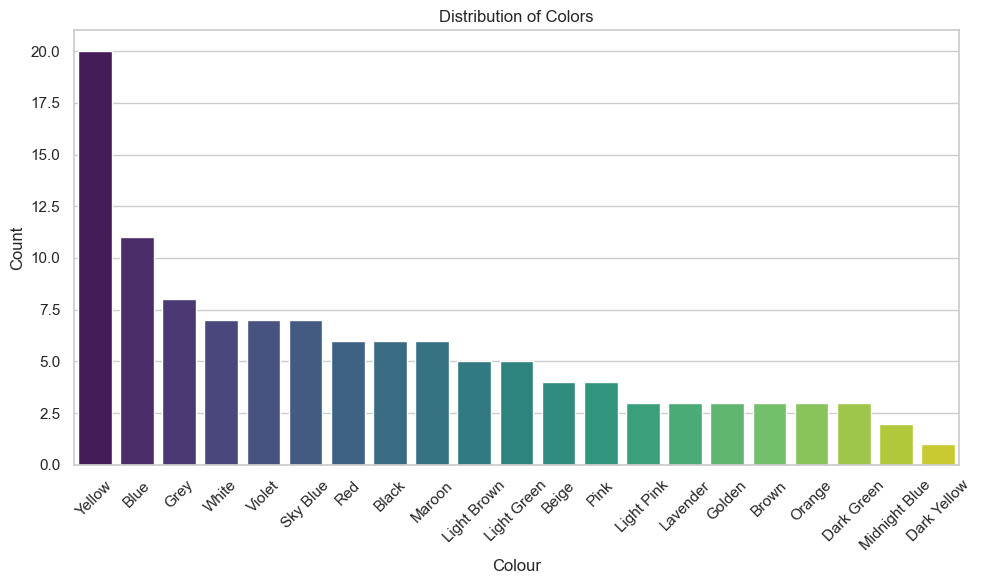

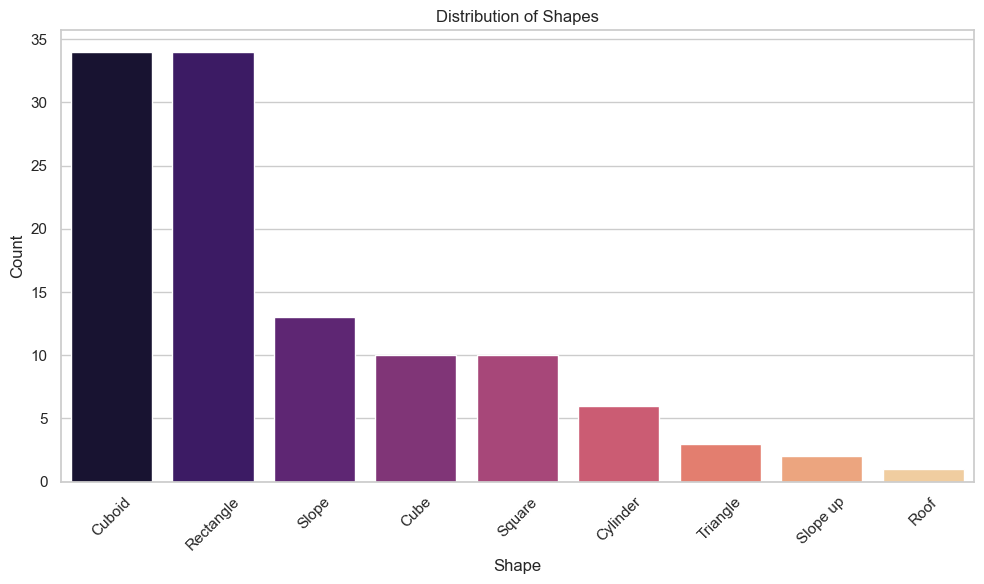

In [25]:
# Set a style for the plots
sns.set(style="whitegrid")

# Plot 1: Distribution of Colors
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='colour_name', order=combined_df['colour_name'].value_counts().index, palette="viridis")
plt.title("Distribution of Colors")
plt.xlabel("Colour")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("distribution_of_colors.png")
plt.show()

# Plot 2: Distribution of Shapes
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='shape', order=combined_df['shape'].value_counts().index, palette="magma")
plt.title("Distribution of Shapes")
plt.xlabel("Shape")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("distribution_of_shapes.png")
plt.show()